# SMSN: Stochastic Model Simulator on Networks
SMSN is a tool to estimate the firm size in a production network based on [Bouchaud-Mezard model](https://www.sciencedirect.com/science/article/pii/S0378437100002053?via%3Dihub).

### Bouchaud-Mezard Model
The BM model consists of the multiplicative stochastic process and the network effect from interactions of firms as follow:
$$X_i(t+1) = a_i (t)X_i(t) +\sum^N  _{j(\neq i)}  \left( J_{ij}  X_j(t)-J_{ji}  X_i(t) \right) ,$$
where $a_i$ is a Gaussian random variable $\mathrm{N}(m,\sigma^2)$ and we set $m=1$.
Here we see $X_i$ as the asset of $i$-th firm and define the dealing matrix $J_{ij} = JA_{ij}/k_j$ where $A_{ij}$is the adjancy matrix and $k_{j} = \sum_i{A_{ij}}$. Therefore, right-hand-side of above equation consists of stochastic asset change and positive and negative money flow seen as sales and costs. 

Model Parameters
- $A_{ij}$: adjacency matrix (network information)
- $\sigma^2$: variance of stocastic variable
- $J$: share of asset

## Usage of SMSN
You can use smsn as python module.
This simulator based on BM model is applicable for undirected network or strongly connected part of directed network.
The program uses [numpy](https://numpy.org/), [scipy](https://www.scipy.org/) and [networkx](https://networkx.github.io/documentation/stable/index.html).

In [1]:
#==========================================
#  import packages
#==========================================
%matplotlib inline
import numpy as np
import networkx as nx
import numpy.random as rd
import smsn
import matplotlib.pyplot as plt

### Examples
For example, we apply bmSimulate function with $J=0.2,\sigma^2=0.1$ for the random network generated by Watts-Strogatz model.

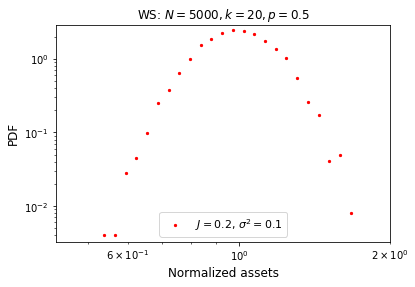

In [2]:
# Generate the random network
G_ws = nx.connected_watts_strogatz_graph(n=5000, k=20, p=0.5)

# bmSimulation(Time, G, J, var_a)
assets, sales, costs = smsn.bmSimulation(10000, G_ws, 0.2, 0.1)
"""
Return the results from the simulation based on BM model 
    Parameters
    ----------
    Time : Number of iterations
    G : NetworkX Graph or Strongly connected graph
    J : Share of asset J<1.0 (BM model parameter)
    var_a : Variance of a (BM model parameter)

    Returns
    -------
    Return list [Asset_i, Sales_i, Costs_i] after Time iterations
    
    Asset_next = a_i * Asset_i + Sales_i - Costs_i
    where a_i is a random variable with a Gaussian distribution.
    Note that we set mean of a_i as m=1.    
"""
    
# plot assets distribution 
counts, bin_edges = np.histogram(assets, bins=np.logspace(min(np.log10(assets)),max(np.log10(assets)), 25), normed=True)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
plt.scatter(bin_centres, counts, s = 5, color = 'red', marker='o',label = '$J=0.2$, $\sigma^2 = 0.1$')
plt.xscale('log')
plt.xlabel('Normalized assets', fontsize = 12)
plt.yscale('log')
plt.ylabel('PDF', fontsize = 12)
plt.xlim([0.8*min(bin_centres), max(bin_centres)*1.2])
plt.ylim([0.8*np.sort(counts[np.where(counts!=0)[0]])[0], np.sort(counts)[::-1][0]*1.2])
plt.title('WS: $N=5000,k=20,p=0.5$')
plt.legend(loc='lower center', fontsize=11)
plt.show()